In [125]:
!apt install git

# Change to your working directory
%cd /content

# Clone the shared GitHub repository
!git clone https://github.com/Adamsomondi/BANK-CHURN-PREDICTION.git

# Move into the repo
%cd BANK-CHURN-PREDICTION

# Checks the contents of the repository
!ls -la

# Ensures you are in the correct repository
%cd /content/BANK-CHURN-PREDICTION

[WinError 2] The system cannot find the file specified: '/content'
d:\OneDrive\Documents\GitHub\BANK-CHURN-PREDICTION\BANK-CHURN-PREDICTION\BANK-CHURN-PREDICTION\BANK-CHURN-PREDICTION\BANK-CHURN-PREDICTION\BANK-CHURN-PREDICTION\BANK-CHURN-PREDICTION


'apt' is not recognized as an internal or external command,
operable program or batch file.


[WinError 2] The system cannot find the file specified: 'BANK-CHURN-PREDICTION'
d:\OneDrive\Documents\GitHub\BANK-CHURN-PREDICTION\BANK-CHURN-PREDICTION\BANK-CHURN-PREDICTION\BANK-CHURN-PREDICTION\BANK-CHURN-PREDICTION\BANK-CHURN-PREDICTION\BANK-CHURN-PREDICTION


Cloning into 'BANK-CHURN-PREDICTION'...
fatal: cannot write keep file 'D:/OneDrive/Documents/GitHub/BANK-CHURN-PREDICTION/BANK-CHURN-PREDICTION/BANK-CHURN-PREDICTION/BANK-CHURN-PREDICTION/BANK-CHURN-PREDICTION/BANK-CHURN-PREDICTION/BANK-CHURN-PREDICTION/BANK-CHURN-PREDICTION/.git/objects/pack/pack-0e57c2ea0f77a234b9e068976b41e54e3a5062bf.keep': Filename too long
fatal: fetch-pack: invalid index-pack output


[WinError 3] The system cannot find the path specified: '/content/BANK-CHURN-PREDICTION'
d:\OneDrive\Documents\GitHub\BANK-CHURN-PREDICTION\BANK-CHURN-PREDICTION\BANK-CHURN-PREDICTION\BANK-CHURN-PREDICTION\BANK-CHURN-PREDICTION\BANK-CHURN-PREDICTION\BANK-CHURN-PREDICTION


'ls' is not recognized as an internal or external command,
operable program or batch file.


In [126]:
import pandas as pd

# Correct direct file link
file_id = "1-6FhvYRRgceTptrIMfgvaXkq-QKw8dwf"
file_url = f"https://drive.google.com/uc?id={file_id}"

# Load the dataset
df = pd.read_csv(file_url)
def info():
   column=['Gender','HasCrCard','IsActiveMember','Exited','Complain']
   for col in column:
      print(df[col].value_counts(normalize=True)*100)
   
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [127]:
# Data preprocessing
# Remove duplicate rows
df.drop_duplicates(inplace=True)
# Identifying missing values
missing_values = df.isnull().sum()

#Removing unnecessary columns
df.drop(columns=[col for col in ['CustomerId', 'Surname','RowNumber'] if col in df.columns], inplace=True)

from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
df['Gender']=encoder.fit_transform(df['Gender'])
# Transforming categorical variables
encoder=LabelEncoder()
df['Gender']=encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df, drop_first=False)
columns=[col for col in['Geography_France', 'Geography_Germany', 'Geography_Spain','Card Type_DIAMOND', 'Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER'] if col in df.columns]
for col in columns:
    df[col] = encoder.fit_transform(df[col])

df.head()










,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,2,464,1,0,0,1,0,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1,3,456,0,0,1,1,0,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,3,377,1,0,0,1,0,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,5,350,1,0,0,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,5,425,0,0,1,0,1,0,0


In [128]:
#Descriptive Statistics
# Sample Mean for numerical Columns
Columns = ['Age', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'CreditScore','Point Earned','Satisfaction Score','Tenure']
for col in Columns:
    mean = df[col].mean()
    print(f"The mean of {col.lower()} is {mean}")
print('--------------------------------')

#Sample Median For Numerical Columns
for col in Columns:
    median = df[col].median()
    print(f"The median of {col.lower()} is {median}")
print('--------------------------------')
print(info())



The mean of age is 38.9218
The mean of balance is 76485.889288
The mean of numofproducts is 1.5302
The mean of estimatedsalary is 100090.239881
The mean of creditscore is 650.5288
The mean of point earned is 606.5151
The mean of satisfaction score is 3.0138
The mean of tenure is 5.0128
--------------------------------
The median of age is 37.0
The median of balance is 97198.54000000001
The median of numofproducts is 1.0
The median of estimatedsalary is 100193.915
The median of creditscore is 652.0
The median of point earned is 605.0
The median of satisfaction score is 3.0
The median of tenure is 5.0
--------------------------------
Gender
1    54.57
0    45.43
Name: proportion, dtype: float64
HasCrCard
1    70.55
0    29.45
Name: proportion, dtype: float64
IsActiveMember
1    51.51
0    48.49
Name: proportion, dtype: float64
Exited
0    79.62
1    20.38
Name: proportion, dtype: float64
Complain
0    79.56
1    20.44
Name: proportion, dtype: float64
None


In [129]:
# Save Cleaned Data
# Create a 'data' directory if it doesn't exist.
import os
os.makedirs('data', exist_ok=True)

# Save Cleaned Data
cleaned_data_path = "data/cleaned_data.csv"

# Save the DataFrame to a CSV file
df.to_csv(cleaned_data_path, index=False)

print(f"Cleaned data saved to {cleaned_data_path}")

# Update the .gitignore file
gitignore_path = ".gitignore"
ignore_entry = "data/cleaned_data.csv\n"

# Ensure the .gitignore file exists and contains the ignore entry
with open(gitignore_path, 'a') as f:
    f.write(ignore_entry)

print("Updated .gitignore to exclude data/cleaned_data.csv")

Cleaned data saved to data/cleaned_data.csv
Updated .gitignore to exclude data/cleaned_data.csv


In [130]:
#Exploratory data analysis



In [131]:

df.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100,0.501400,0.250900,0.247700,0.250700,0.25020,0.249500,0.249600
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839,0.500023,0.433553,0.431698,0.433438,0.43315,0.432745,0.432803
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000,1.000000,1.000000,0.000000,1.000000,1.00000,0.000000,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


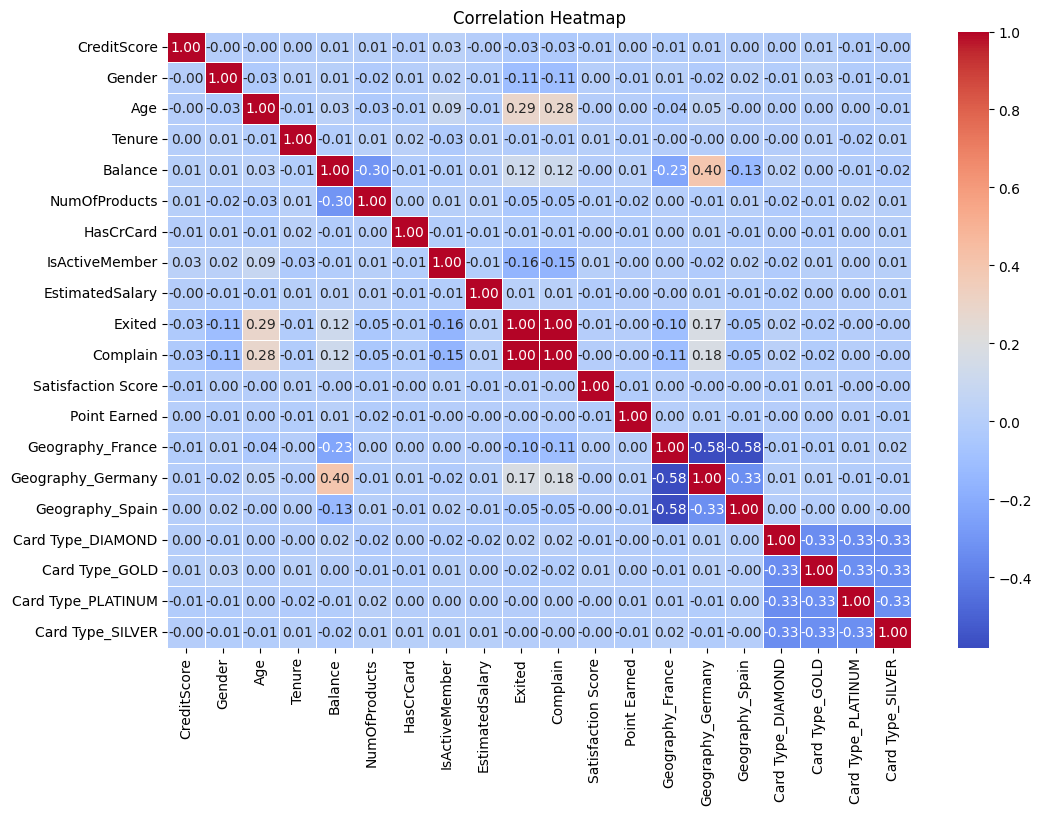

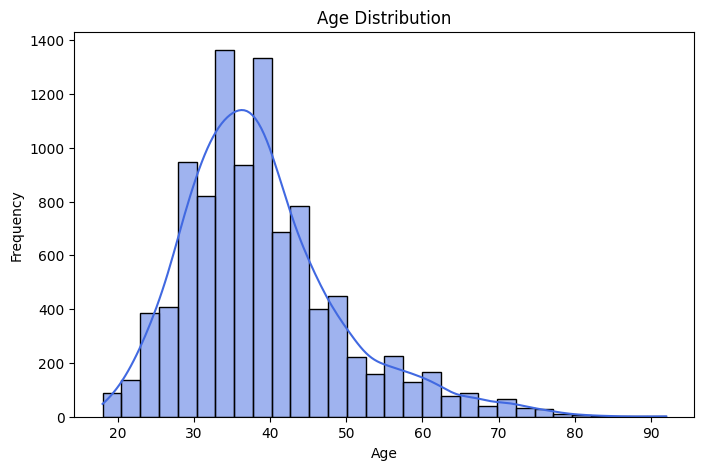

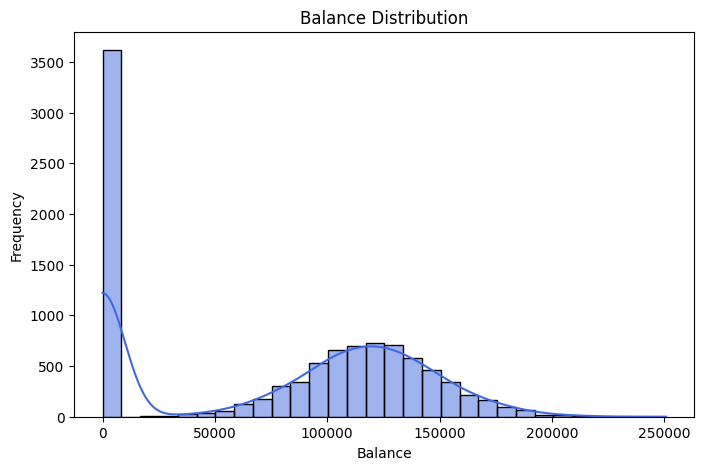

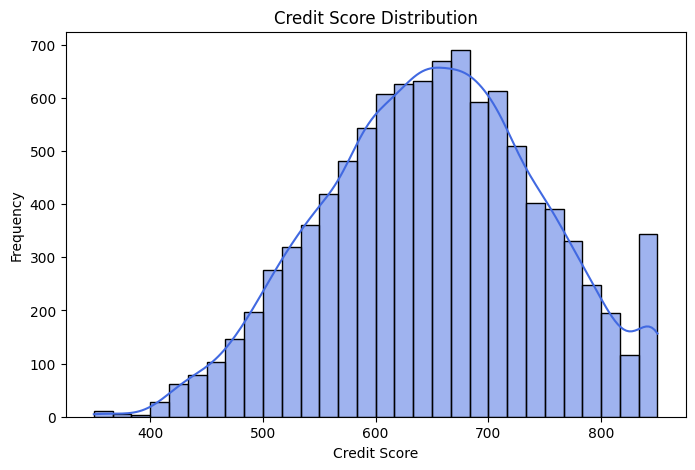

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

In [132]:
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#heatmap to visualize correlations
corr_matrix=df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")        
plt.show()
# Distribution of Age
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], bins=30, kde=True, color="royalblue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()
# Distribution of Balance
plt.figure(figsize=(8, 5))
sns.histplot(df["Balance"], bins=30, kde=True, color="royalblue")
plt.title("Balance Distribution")
plt.xlabel("Balance")
plt.ylabel("Frequency")
plt.show()
# Credit Score Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["CreditScore"], bins=30, kde=True, color="royalblue")
plt.title("Credit Score Distribution")
plt.xlabel("Credit Score")
plt.ylabel("Frequency")
plt.show()
#sex vs churn
plt.figure(figsize=(8, 5))





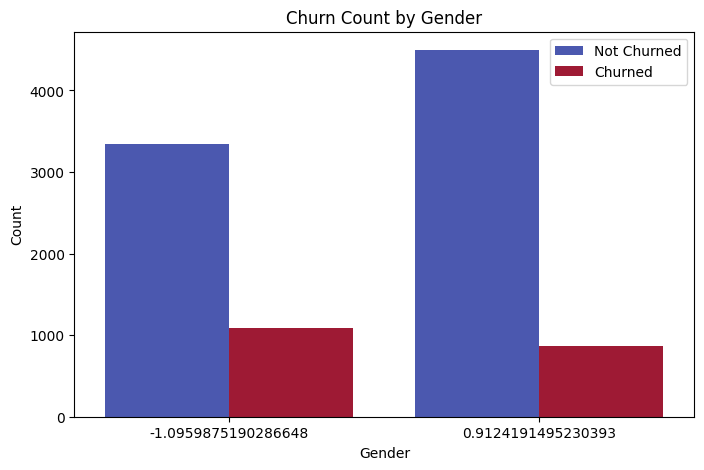

In [137]:
plt.figure(figsize=(8,5))
sns.countplot(x=df["Gender"], hue=df["Exited"], palette="coolwarm")

# Labels
plt.title("Churn Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(["Not Churned", "Churned"])
plt.show()

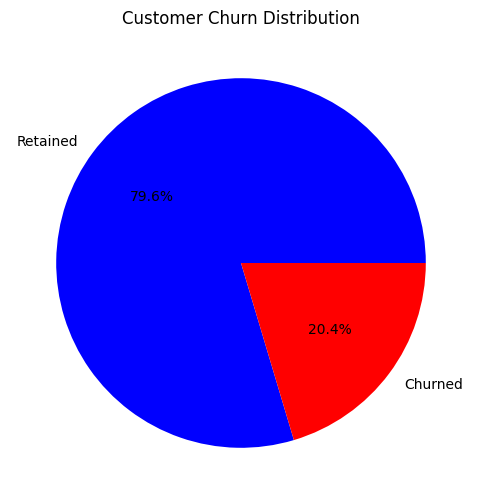

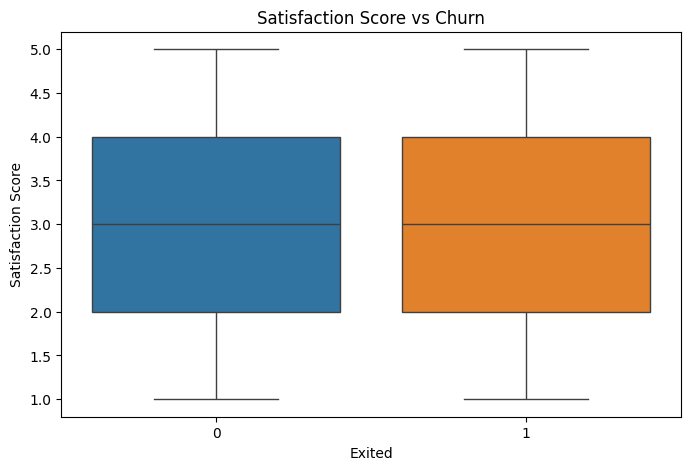

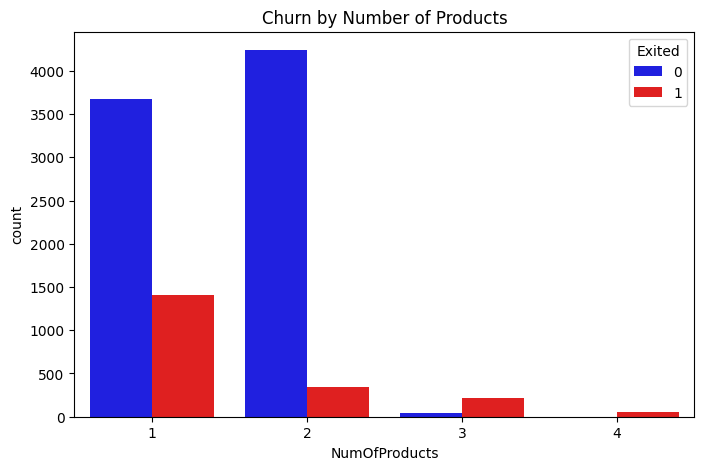

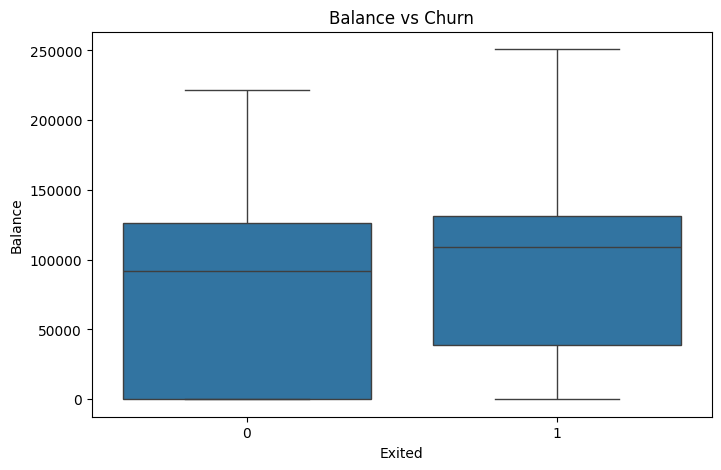

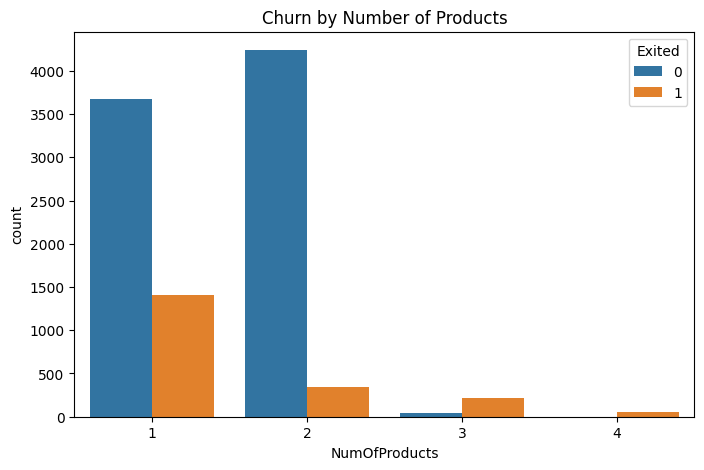

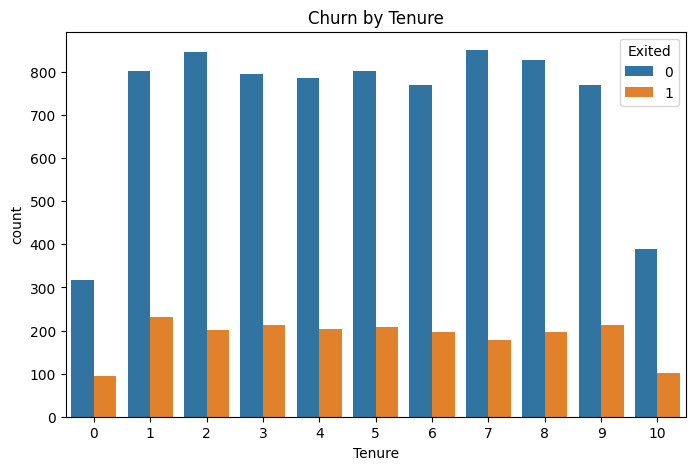

In [133]:
#relationship of variable with churn

# Churn Distribution
churn_counts = df["Exited"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=["Retained", "Churned"], autopct="%1.1f%%", colors=["blue", "red"])
plt.title("Customer Churn Distribution")
plt.show()

# Churn by Customer Satisfaction Score
plt.figure(figsize=(8, 5))
sns.boxplot(x="Exited", y="Satisfaction Score", data=df, hue="Exited", legend=False)
plt.title("Satisfaction Score vs Churn")
plt.show()

# Churn by Number of Products
plt.figure(figsize=(8, 5))
sns.countplot(x="NumOfProducts", hue="Exited", data=df, palette=["blue", "red"])
plt.title("Churn by Number of Products")
plt.show()



# Balance vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x="Exited", y="Balance", data=df)
plt.title("Balance vs Churn")
plt.show()

# Number of Products vs Churn
plt.figure(figsize=(8, 5))
sns.countplot(x="NumOfProducts", hue="Exited", data=df)
plt.title("Churn by Number of Products")
plt.show()

# Tenure vs Churn
plt.figure(figsize=(8, 5))
sns.countplot(x="Tenure", hue="Exited", data=df)
plt.title("Churn by Tenure")
plt.show()

In [134]:
# Scale Numerical Features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_features)

from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Resolve Data Quality Issues
import numpy as np
from scipy import stats

df = df[(np.abs(stats.zscore(df[numerical_features])) < 3).all(axis=1)]

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Point Earned', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Card Type_DIAMOND',
       'Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER'],
      dtype='object')


In [135]:
#Replace you-branch-name with what you are working on i.e edaanalysis etc..
!git checkout -b edaanalysis -q #meaning quite mode

fatal: Cannot update paths and switch to branch 'edaanalysis' at the same time.


In [136]:
from google.colab import drive
drive.mount('/content/drive')

!ls -la "/content/drive/My Drive/Colab Notebooks"
!find "/content/drive/My Drive" -name "Eda_Analysis.ipynb" #replace "Data_Preprocessing.ipynb" with the name of your file i.e edaanalysis.ipynb

!cp "/content/drive/My Drive/Colab Notebooks/Eda_Analysis.ipynb" /content/BANK-CHURN-PREDICTION/ #replace Data_Preprocessing.ipynb with the name of your file

!ls -la "/content/BANK-CHURN-PREDICTION/"

ModuleNotFoundError: No module named 'google'